In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
import numpy.linalg as la
import matplotlib.style as style

mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
# print(mpl.rcParams['font.size'])
mpl.rcParams['font.size'] = 13.5

# Baseline

In [2]:
data_sizes = ['10MB', '100MB', '1GB']
query_numbers = list(np.arange(22) + 1)
print(query_numbers)
party_number = 2


data_size_dict = {}

from collections import defaultdict

for data_size in data_sizes:
    time_taken_col = f"{data_size}"
    cols = ["query", time_taken_col]
    path = f"baseline_data/{data_size}_{party_number}.csv"
    query_dict = defaultdict(list)

    print(query_dict)

    # try:
    data = pd.read_csv(path, names=cols, header=None)
    time_col = data.loc[:,time_taken_col]
    query_col = data.loc[:,"query"]
    # data.set_axis(cols, axis=1)
    for idx, query_num in enumerate(query_col):
        query_dict[query_num].append(time_col[idx])
    print(query_dict)
    data_size_dict[data_size] = [pd.Series(value).rename(k) for k, value in query_dict.items()]
    # except:
    #     print(f"Failed to read file {path}")
baseline_dict = data_size_dict

for i in range(len(query_numbers)):
    print(baseline_dict['100MB'][i])

# Returns a baseline_dict with key = data size

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
defaultdict(<class 'list'>, {})
defaultdict(<class 'list'>, {1: [0.2809910774230957], 2: [0.0842359066009521], 3: [0.3759617805480957], 4: [0.3366844654083252], 5: [0.2930083274841308], 6: [0.254868745803833], 7: [0.3377368450164795], 8: [0.3568253517150879], 9: [0.382488489151001], 10: [0.3204598426818847], 11: [0.0709359645843505], 12: [0.2756702899932861], 13: [0.0905163288116455], 14: [0.2558867931365967], 15: [0.245556354522705], 16: [0.1094927787780761], 17: [0.2542705535888672], 18: [0.28328537940979], 19: [0.2822668552398681], 20: [0.2440838813781738], 21: [0.2514874935150146], 22: [0.0979318618774414]})
defaultdict(<class 'list'>, {})
defaultdict(<class 'list'>, {1: [0.935096025466919], 2: [0.2334918975830078], 3: [1.1383743286132812], 4: [1.104546308517456], 5: [1.0867493152618408], 6: [0.8677480220794678], 7: [1.135599136352539], 8: [1.175046682357788], 9: [1.2394776344299316], 10: [1.24110174179

# Data Station

In [3]:
data_sizes = ['10MB', '100MB', '1GB']
query_numbers = list(np.arange(22) + 1)
print(query_numbers)
party_number = 2


data_size_dict = {}

from collections import defaultdict

for data_size in data_sizes:
    time_taken_col = f"{data_size}"
    cols = ["query", time_taken_col]
    path = f"ds_data/{data_size}_{party_number}.csv"
    query_dict = defaultdict(list)

    print(query_dict)

    # try:
    data = pd.read_csv(path, names=cols, header=None)
    time_col = data.loc[:,time_taken_col]
    query_col = data.loc[:,"query"]
    # data.set_axis(cols, axis=1)
    for idx, query_num in enumerate(query_col):
        query_dict[query_num].append(time_col[idx])
    print(query_dict)
    data_size_dict[data_size] = [pd.Series(value).rename(k) for k, value in query_dict.items()]
    # except:
    #     print(f"Failed to read file {path}")
data_station_dict = data_size_dict

for i in range(len(query_numbers)):
    print(data_station_dict['100MB'][i])

# Returns a baseline_dict with key = data size

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
defaultdict(<class 'list'>, {})
defaultdict(<class 'list'>, {1: [2.1309478282928467, 2.14896297454834, 2.0911426544189453], 2: [1.9173133373260496, 1.9322190284729004], 3: [2.2450621128082275, 2.2277352809906006], 4: [2.2059590816497803, 2.176608800888061], 5: [2.257619380950928, 2.249243259429932], 6: [2.096252918243408], 7: [2.243595123291016], 8: [2.296489953994751], 9: [2.405900716781616], 10: [2.23433256149292], 11: [1.893432855606079], 12: [2.203991651535034], 13: [1.9165544509887693], 14: [2.1218206882476807], 15: [2.0904946327209477], 16: [1.881297826766968], 17: [2.095630168914795], 18: [2.335472822189331], 19: [2.080549716949463], 20: [2.246187210083008], 21: [2.222836494445801], 22: [1.915485143661499]})
defaultdict(<class 'list'>, {})
defaultdict(<class 'list'>, {1: [4.343086242675781], 2: [2.271451473236084], 3: [4.223223686218262], 4: [4.134445667266846], 5: [4.301817893981934], 6: [3.62896895

# Plots

In [4]:
def raw_mmm(df):
    median = df.median()
    min = df.min()
    max = df.max()
    return min, median, max

[(0.2809910774230957, 0.2809910774230957, 0.2809910774230957), (0.0842359066009521, 0.0842359066009521, 0.0842359066009521), (0.3759617805480957, 0.3759617805480957, 0.3759617805480957), (0.3366844654083252, 0.3366844654083252, 0.3366844654083252), (0.2930083274841308, 0.2930083274841308, 0.2930083274841308), (0.254868745803833, 0.254868745803833, 0.254868745803833), (0.3377368450164795, 0.3377368450164795, 0.3377368450164795), (0.3568253517150879, 0.3568253517150879, 0.3568253517150879), (0.382488489151001, 0.382488489151001, 0.382488489151001), (0.3204598426818847, 0.3204598426818847, 0.3204598426818847), (0.0709359645843505, 0.0709359645843505, 0.0709359645843505), (0.2756702899932861, 0.2756702899932861, 0.2756702899932861), (0.0905163288116455, 0.0905163288116455, 0.0905163288116455), (0.2558867931365967, 0.2558867931365967, 0.2558867931365967), (0.245556354522705, 0.245556354522705, 0.245556354522705), (0.1094927787780761, 0.1094927787780761, 0.1094927787780761), (0.2542705535888

/Users/christopherzhu/.virtualenvs/datastation/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1148: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/christopherzhu/.virtualenvs/datastation/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1149: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


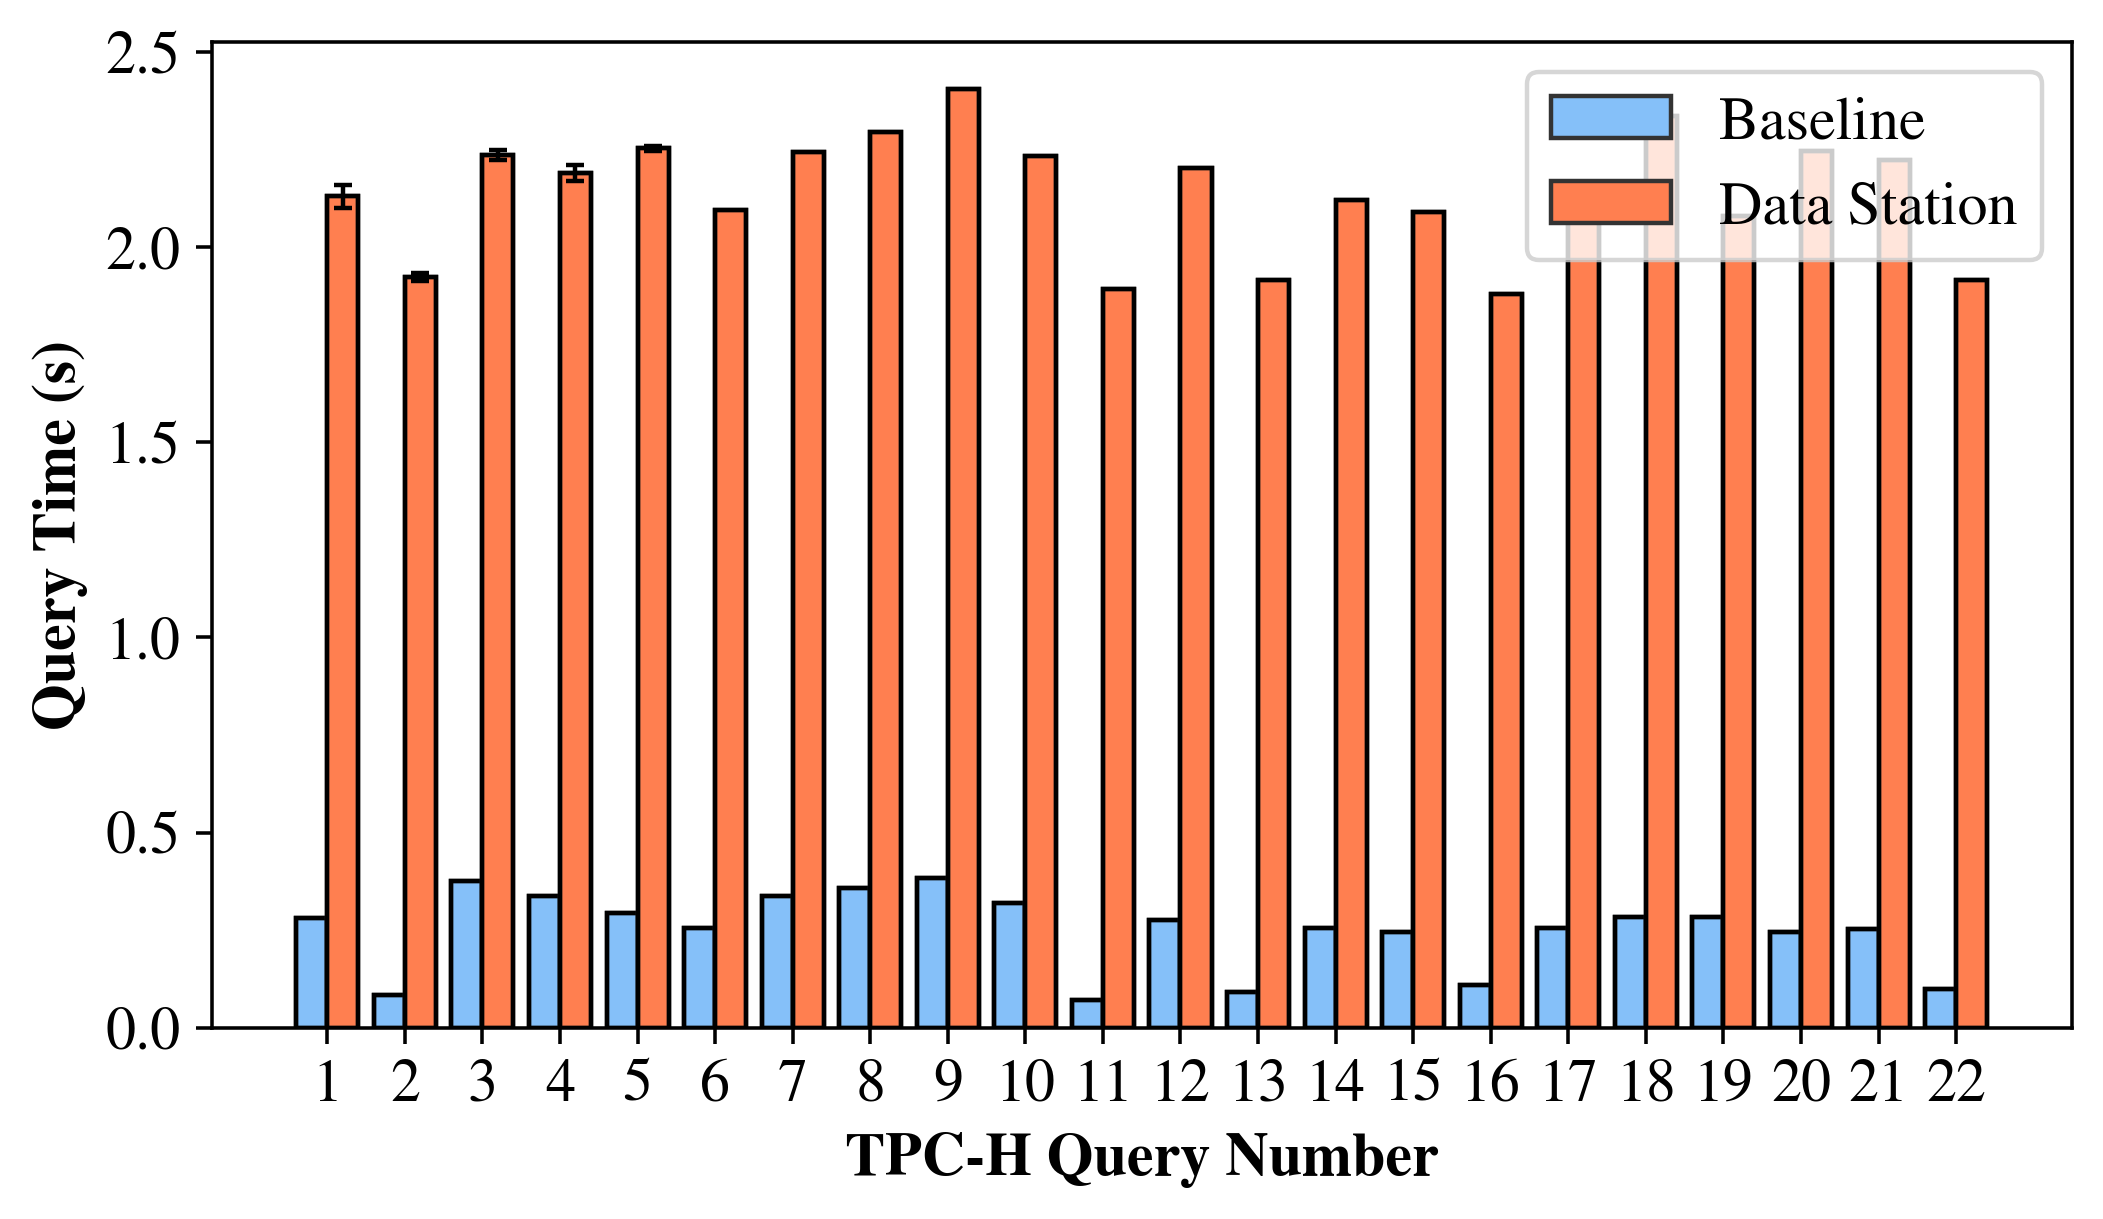

In [5]:
data_left = baseline_dict['10MB']
data_left_mmm = [raw_mmm(col) for col in data_left]
print(data_left_mmm)

data_right = data_station_dict['10MB']
data_right_mmm = [raw_mmm(col) for col in data_right]
print(data_right_mmm)

X_axis = np.arange(22)+1

width = 0.4

# min_no_sev, median_no_sev, max_no_sev = raw_mmm(no_sev)
# min_sev, median_sev, max_sev = raw_mmm(sev)

stdev_left = [col.std() for col in data_left] + ([float("nan")] * (len(data_right) - len(data_left)))
medians_left = [row[1] for row in data_left_mmm] + ([float("nan")] * (len(data_right) - len(data_left)))
print(stdev_left)
print(medians_left)

stdev_right = [col.std() for col in data_right]
medians_right = [row[1] for row in data_right_mmm]

plt.figure(figsize=(7.5, 4), dpi=320)

plt.bar(x=X_axis-width/2,width=width,height=medians_left,label="Baseline",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='#85C0F9'
        )


plt.bar(x=X_axis-width/2,width=width,height=medians_left,yerr=stdev_left,
        # edgecolor=colors_right[i],
        # edgecolor=[.2,.2,.2],
        # alpha=0.8,
        # label=labels_left[i],
        # color='none',
        # color=colors_right[i],
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,label="Data Station",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='coral'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,yerr=stdev_right,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

plt.xlabel("TPC-H Query Number", fontweight="bold")
plt.ylabel("Query Time (s)", fontweight="bold")
# plt.title("100GB Database Size")
plt.legend()

plt.xticks(X_axis, [col.name for col in data_right])

plt.savefig("10mb.pdf", bbox_inches='tight')

plt.show()

[(0.935096025466919, 0.935096025466919, 0.935096025466919), (0.2334918975830078, 0.2334918975830078, 0.2334918975830078), (1.1383743286132812, 1.1383743286132812, 1.1383743286132812), (1.104546308517456, 1.104546308517456, 1.104546308517456), (1.0867493152618408, 1.0867493152618408, 1.0867493152618408), (0.8677480220794678, 0.8677480220794678, 0.8677480220794678), (1.135599136352539, 1.135599136352539, 1.135599136352539), (1.175046682357788, 1.175046682357788, 1.175046682357788), (1.2394776344299316, 1.2394776344299316, 1.2394776344299316), (1.2411017417907717, 1.2411017417907717, 1.2411017417907717), (0.1820955276489257, 0.1820955276489257, 0.1820955276489257), (1.0271244049072266, 1.0271244049072266, 1.0271244049072266), (0.2787315845489502, 0.2787315845489502, 0.2787315845489502), (0.9632830619812012, 0.9632830619812012, 0.9632830619812012), (0.863896369934082, 0.863896369934082, 0.863896369934082), (0.25795578956604, 0.25795578956604, 0.25795578956604), (0.9824709892272948, 0.98247

/Users/christopherzhu/.virtualenvs/datastation/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1148: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/christopherzhu/.virtualenvs/datastation/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1149: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


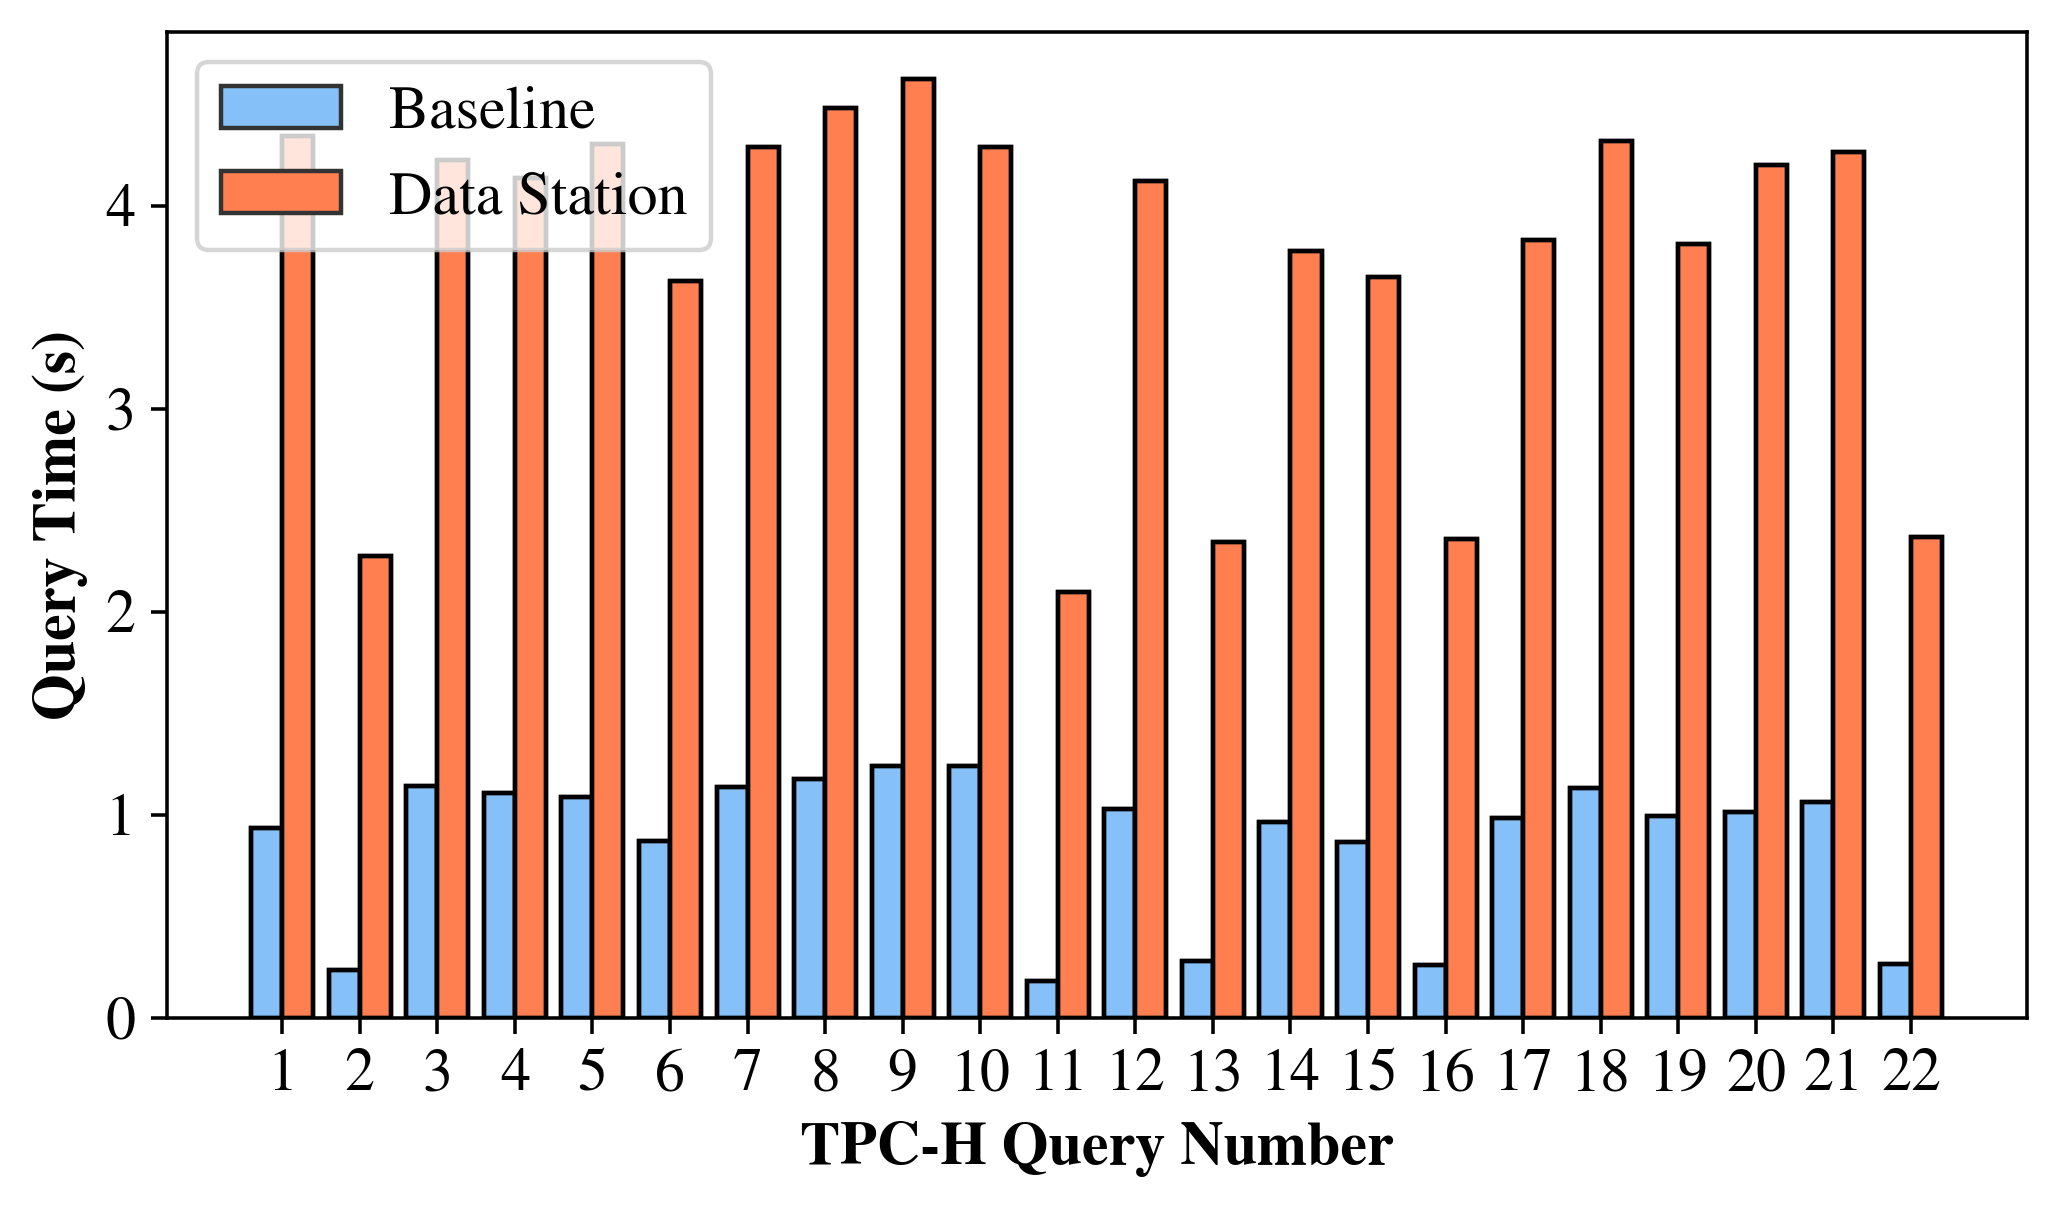

In [6]:
data_left = baseline_dict['100MB']
data_left_mmm = [raw_mmm(col) for col in data_left]
print(data_left_mmm)

data_right = data_station_dict['100MB']
data_right_mmm = [raw_mmm(col) for col in data_right]
print(data_right_mmm)

X_axis = np.arange(22)+1

width = 0.4

# min_no_sev, median_no_sev, max_no_sev = raw_mmm(no_sev)
# min_sev, median_sev, max_sev = raw_mmm(sev)

stdev_left = [col.std() for col in data_left] + ([float("nan")] * (len(data_right) - len(data_left)))
medians_left = [row[1] for row in data_left_mmm] + ([float("nan")] * (len(data_right) - len(data_left)))
print(stdev_left)
print(medians_left)

stdev_right = [col.std() for col in data_right]
medians_right = [row[1] for row in data_right_mmm]

plt.figure(figsize=(7.5, 4), dpi=320)

plt.bar(x=X_axis-width/2,width=width,height=medians_left,label="Baseline",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='#85C0F9'
        )


plt.bar(x=X_axis-width/2,width=width,height=medians_left,yerr=stdev_left,
        # edgecolor=colors_right[i],
        # edgecolor=[.2,.2,.2],
        # alpha=0.8,
        # label=labels_left[i],
        # color='none',
        # color=colors_right[i],
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,label="Data Station",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='coral'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,yerr=stdev_right,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

plt.xlabel("TPC-H Query Number", fontweight="bold")
plt.ylabel("Query Time (s)", fontweight="bold")
# plt.title("100GB Database Size")
plt.legend()

plt.xticks(X_axis, [col.name for col in data_right])

plt.savefig("100mb.pdf", bbox_inches='tight')

plt.show()

[(7.589044570922852, 7.589044570922852, 7.589044570922852), (1.0945637226104736, 1.0945637226104736, 1.0945637226104736), (9.182021379470823, 9.182021379470823, 9.182021379470823), (8.96024775505066, 8.96024775505066, 8.96024775505066), (9.102052688598633, 9.102052688598633, 9.102052688598633), (7.540270566940308, 7.540270566940308, 7.540270566940308), (9.325902700424194, 9.325902700424194, 9.325902700424194), (9.35598111152649, 9.35598111152649, 9.35598111152649), (10.187437057495115, 10.187437057495115, 10.187437057495115), (9.506426572799684, 9.506426572799684, 9.506426572799684), (0.8150284290313721, 0.8150284290313721, 0.8150284290313721), (8.794125080108643, 8.794125080108643, 8.794125080108643), (1.6272296905517578, 1.6272296905517578, 1.6272296905517578), (7.626472234725952, 7.626472234725952, 7.626472234725952), (7.934938192367554, 7.934938192367554, 7.934938192367554), (1.2703218460083008, 1.2703218460083008, 1.2703218460083008), (8.159912586212158, 8.159912586212158, 8.15991

/Users/christopherzhu/.virtualenvs/datastation/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1148: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/christopherzhu/.virtualenvs/datastation/lib/python3.10/site-packages/matplotlib/axes/_axes.py:1149: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


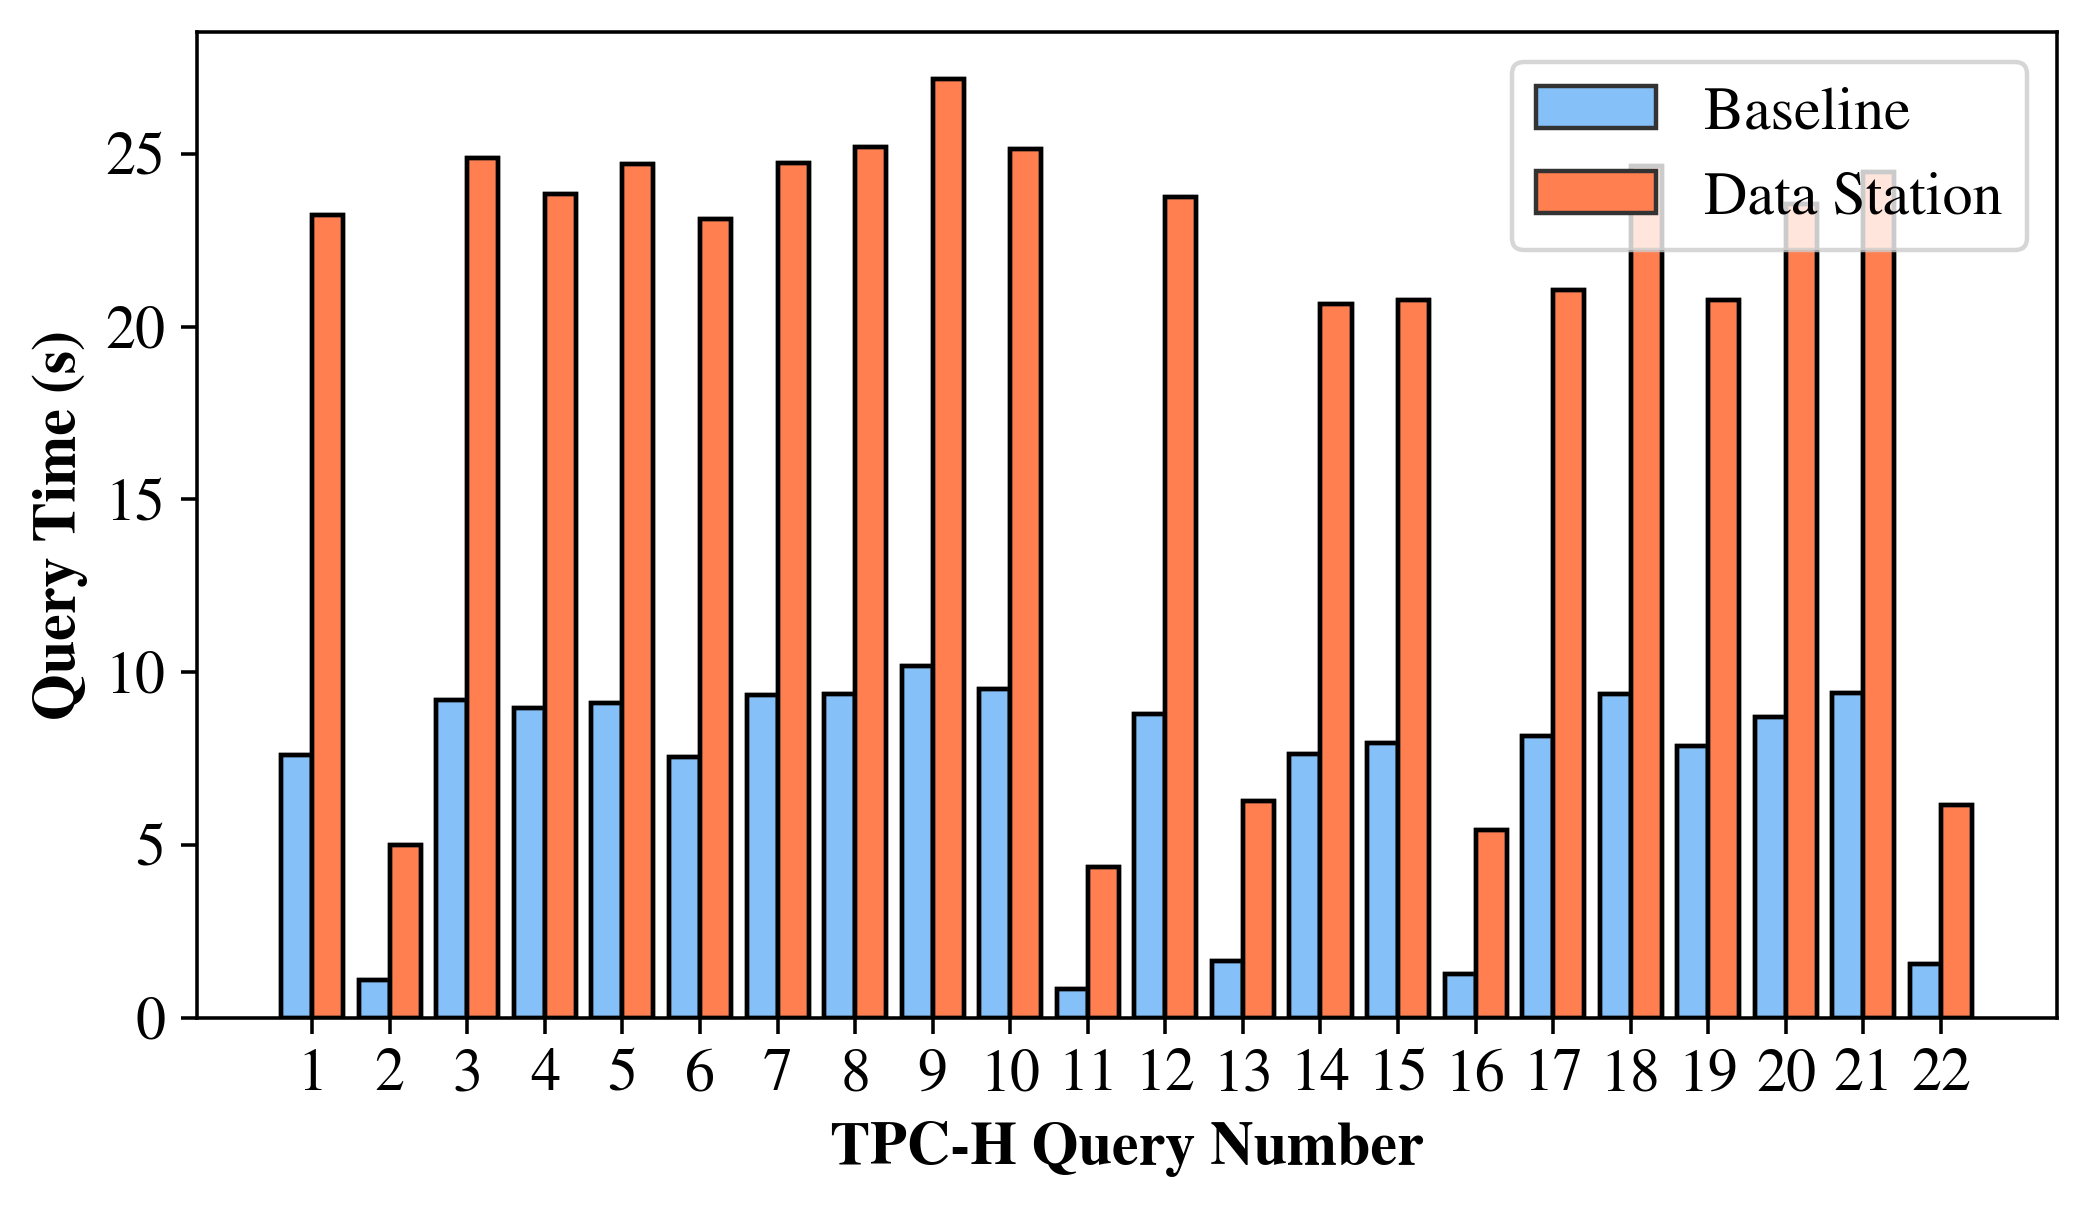

In [7]:
data_left = baseline_dict['1GB']
data_left_mmm = [raw_mmm(col) for col in data_left]
print(data_left_mmm)

data_right = data_station_dict['1GB']
data_right_mmm = [raw_mmm(col) for col in data_right]
print(data_right_mmm)

X_axis = np.arange(22)+1

width = 0.4

# min_no_sev, median_no_sev, max_no_sev = raw_mmm(no_sev)
# min_sev, median_sev, max_sev = raw_mmm(sev)

stdev_left = [col.std() for col in data_left] + ([float("nan")] * (len(data_right) - len(data_left)))
medians_left = [row[1] for row in data_left_mmm] + ([float("nan")] * (len(data_right) - len(data_left)))
print(stdev_left)
print(medians_left)

stdev_right = [col.std() for col in data_right]
medians_right = [row[1] for row in data_right_mmm]

plt.figure(figsize=(7.5, 4), dpi=320)

plt.bar(x=X_axis-width/2,width=width,height=medians_left,label="Baseline",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='#85C0F9'
        )


plt.bar(x=X_axis-width/2,width=width,height=medians_left,yerr=stdev_left,
        # edgecolor=colors_right[i],
        # edgecolor=[.2,.2,.2],
        # alpha=0.8,
        # label=labels_left[i],
        # color='none',
        # color=colors_right[i],
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,label="Data Station",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='coral'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,yerr=stdev_right,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

plt.xlabel("TPC-H Query Number", fontweight="bold")
plt.ylabel("Query Time (s)", fontweight="bold")
# plt.title("100GB Database Size")
plt.legend()

plt.xticks(X_axis, [col.name for col in data_right])

plt.savefig("1gb.pdf", bbox_inches='tight')

plt.show()